In [14]:
# Pseudotime analysis and Diff. Exp analysis using Monocle
library(monocle)
library(M3Drop)
library(SingleCellExperiment)
set.seed(1)

In [3]:
umi <- readRDS("after_feat_sel.rds")

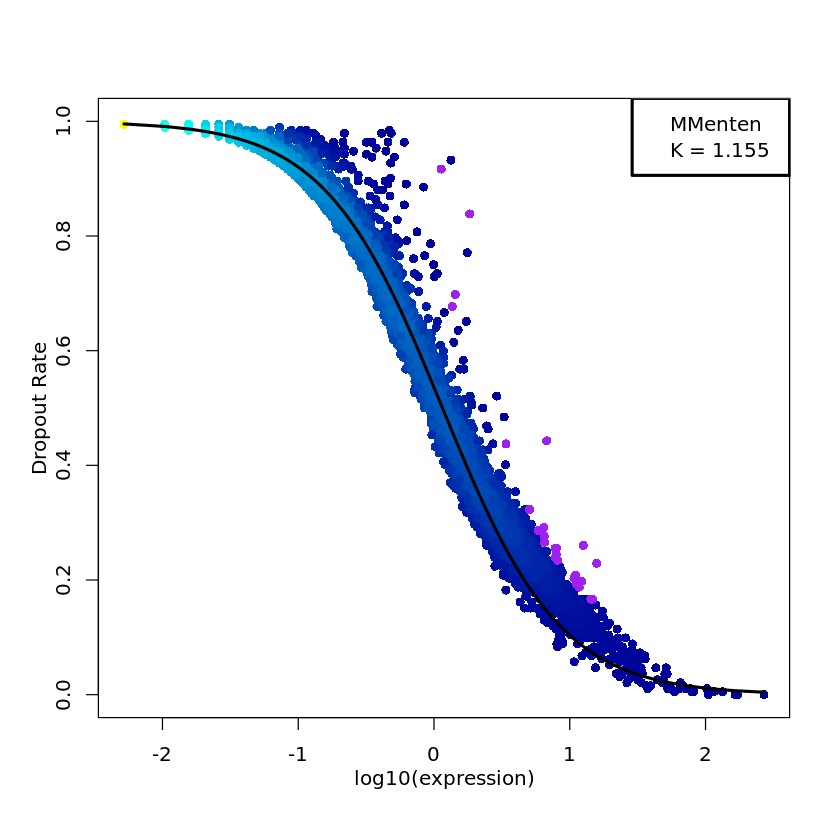

In [10]:
# Monocle can only only work on a few key genes, not all -- so let's select for them
m3dGenes <- as.character(
    M3DropFeatureSelection(counts(umi))$Gene
)

d <- umi[which(rownames(umi) %in% m3dGenes), ]
d <- d[!duplicated(rownames(d)), ]

In [15]:
colnames(d) <- 1:ncol(d)
geneNames <- rownames(d)
rownames(d) <- 1:nrow(d)
pd <- data.frame(timepoint = "outliers" )
pd <- new("AnnotatedDataFrame", data=pd)
fd <- data.frame(gene_short_name = geneNames)
fd <- new("AnnotatedDataFrame", data=fd)

dCellData <- newCellDataSet(d, phenoData = pd, featureData = fd, expressionFamily = tobit())
dCellData <- setOrderingFilter(dCellData, which(geneNames %in% m3dGenes))
dCellData <- estimateSizeFactors(dCellData)
dCellDataSet <- reduceDimension(dCellData, pseudo_expr = 1)
dCellDataSet <- orderCells(dCellDataSet, reverse = FALSE)
plot_cell_trajectory(dCellDataSet)

ERROR: Error in newCellDataSet(d, phenoData = pd, featureData = fd, expressionFamily = tobit()): Error: argument cellData must be a matrix (either sparse from the Matrix package or dense)
